Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [4]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [5]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [6]:
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 4, 10, 1, 1, 5, 5, 3, 6, 10, 4, 7, 7, 7…
$ Glucose                  <dbl> 85, 89, 110, 139, 103, 97, 117, 109, 88, 92, …
$ BloodPressure            <dbl> 66, 66, 92, 80, 30, 66, 92, 75, 58, 92, 78, 6…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 15, 0, 26, 11, 0, 31, 33, 0…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 140, 0, 0, 54, 0, 0, 192, 0,…
$ BMI                      <dbl> 26.6, 28.1, 37.6, 27.1, 43.3, 23.2, 34.1, 36.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.191, 1.441, 0.183, 0.487, 0.3…
$ Age                      <dbl> 31, 21, 30, 57, 33, 22, 38, 60, 22, 28, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Outcome variable would be whether the patient has diabetes or not.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)           |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

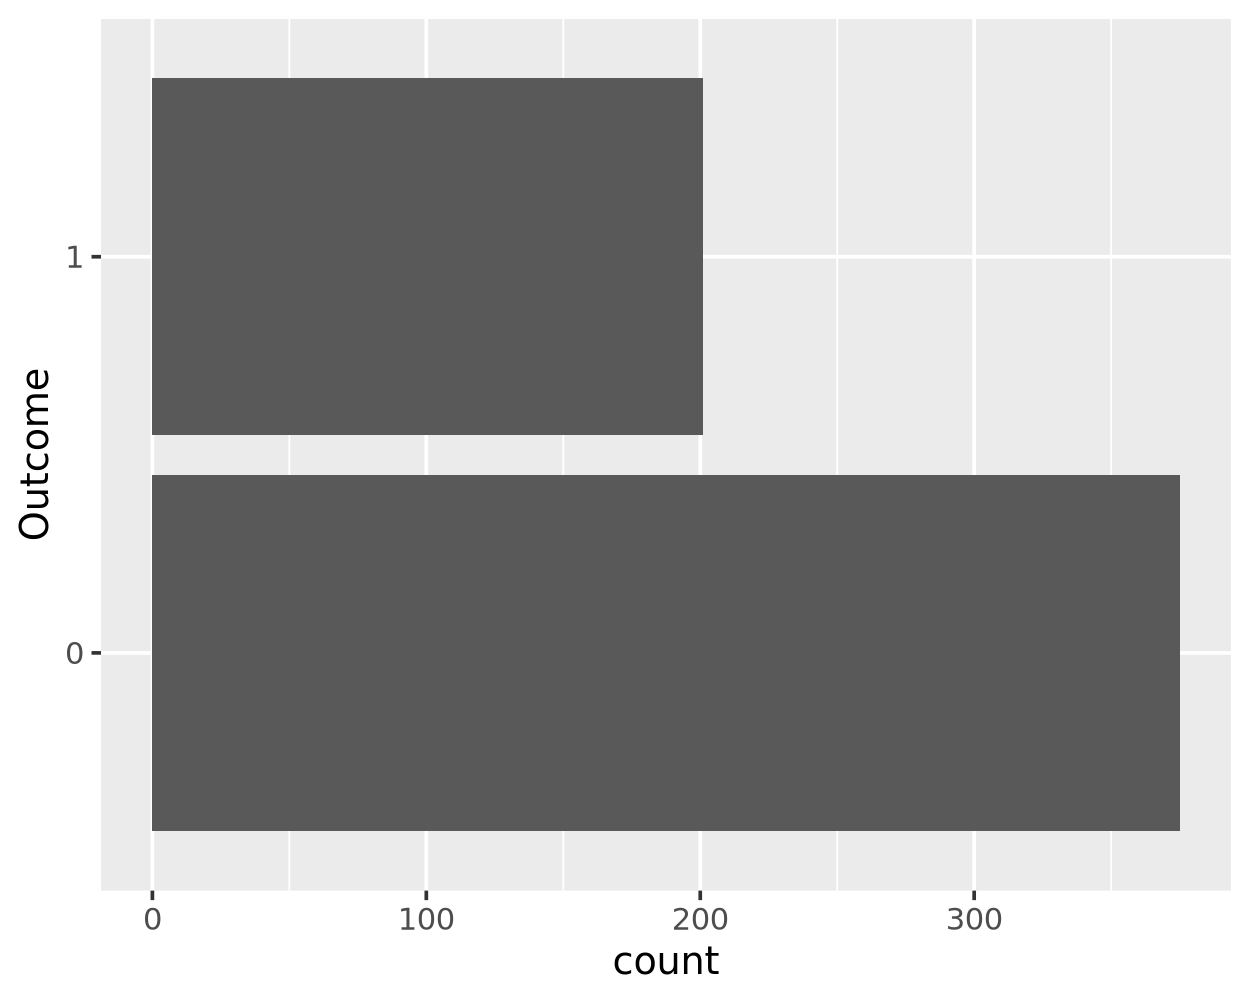

In [8]:
ggplot(diabetes_train, aes(y = Outcome)) + geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, outcome 1 (having diabetes) has ~ 200 while outcome 0 (no diabetes) has double the amount.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [10]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

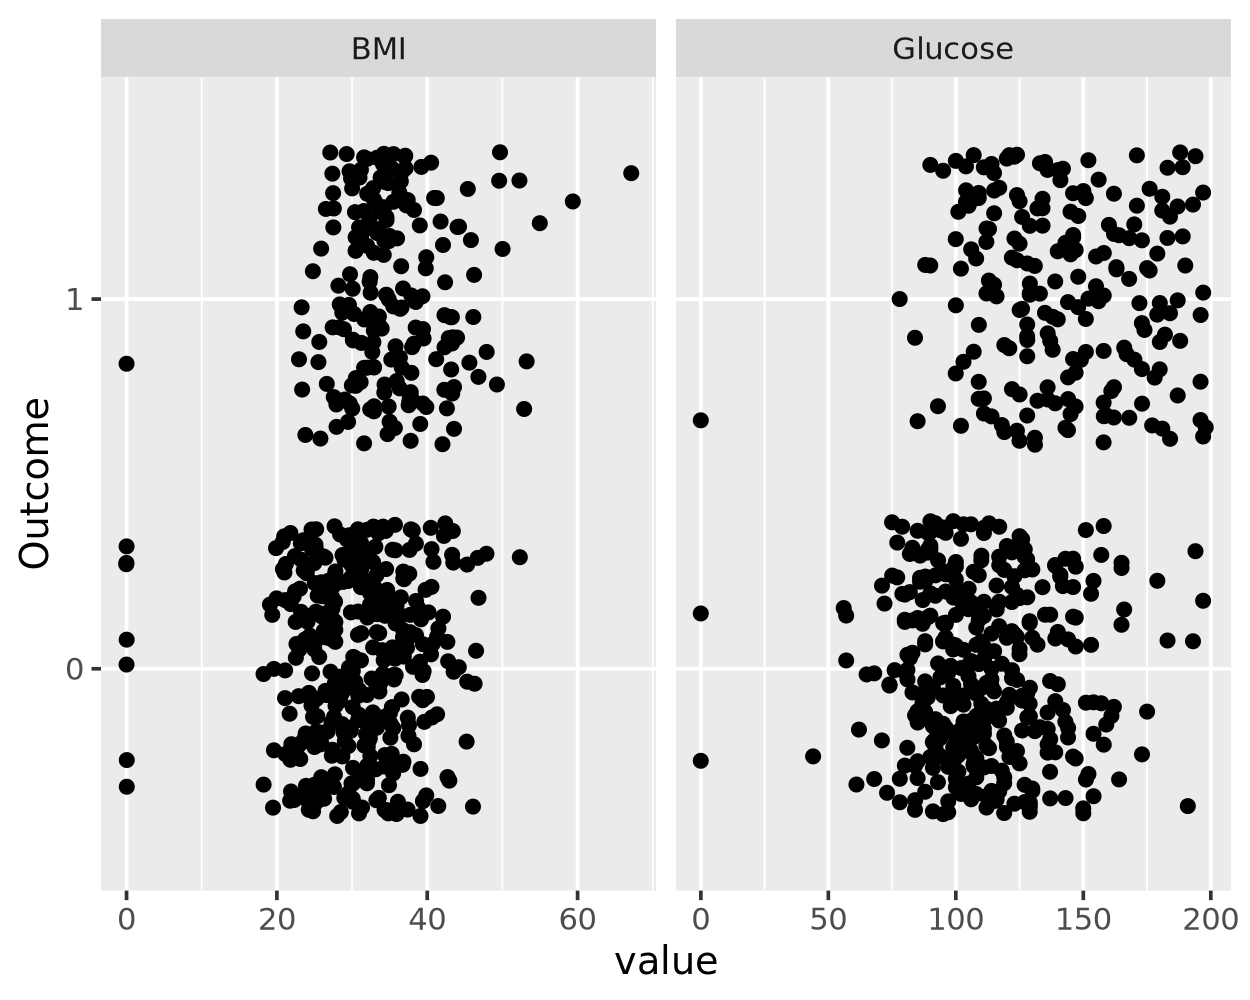

In [26]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
       geom_jitter() +
       facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

Both BMI and Glucose have the same value range when scales argument is removed 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [34]:
mod = logistic_reg () |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

mod_fit

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.69606      0.07976      0.03541  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 576.3 	AIC: 582.3

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [37]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.8244549,0.175545087,5,116,74,0,0,25.6,0.201,30,0
0,0.6918046,0.308195393,10,115,0,0,0,35.3,0.134,29,0
0,0.5249887,0.475011327,3,126,88,41,235,39.3,0.704,27,0
0,0.7969162,0.203083823,8,99,84,0,0,35.4,0.388,50,0
0,0.7630400,0.236959998,9,119,80,35,0,29.0,0.263,29,1
0,0.6880803,0.311919673,13,145,82,19,110,22.2,0.245,57,0
0,0.5403290,0.459671002,11,138,76,0,0,33.2,0.420,35,0
1,0.1995195,0.800480469,3,180,64,25,70,34.0,0.271,26,0
0,0.9502062,0.049793751,2,71,70,27,0,28.0,0.586,22,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [39]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 114  34
         1  11  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- 67 individuals actually had diabetes in the test data
- Of those who had diabetes, 33 were predicted to have diabetes
- 11 individuals were predicted to have diabetes but did not.